In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision
from torchvision import datasets,transforms, models
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable 
import time
from torch import Tensor

In [3]:
import os

In [5]:
path = "Clocks"
transform = transforms.Compose([
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])])

data_image = {x:datasets.ImageFolder(root = os.path.join(path,x),
                                     transform = transform)
              for x in ["train", "val"]}

data_loader_image = {x:torch.utils.data.DataLoader(dataset=data_image[x],
                                                batch_size = 4,
                                                shuffle = False)
                     for x in ["train", "val"]}


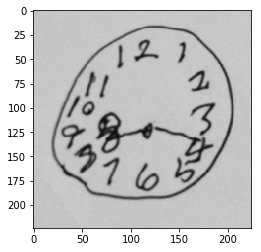

In [6]:
X_train, y_train = next(iter(data_loader_image["train"]))
mean = [0.5,0.5,0.5]
std  = [0.5,0.5,0.5]
img = torchvision.utils.make_grid(data_image["train"][0][0])
img = img.numpy().transpose((1,2,0))
img = img*std+mean

plt.imshow(img)

In [7]:
print(u"训练集个数:", len(data_image["train"]))
print(u"验证集个数:", len(data_image["val"]))

训练集个数: 988
验证集个数: 100


In [8]:
X_train_row = data_image["train"]
X_val_row = data_image["val"]
file1 = open("train.csv", 'r')
file2 = open("val.csv", 'r')
l1 = file1.readlines()
l2 = file2.readlines()
y_val = []
y_val.append(2)
for i in l2[1:]:
    y_val.append(int(i.strip("\n")))
y_train = []
y_train.append(4)
for j in l1[1:]:
    y_train.append(int(j.strip("\n")))

In [9]:
X_train = []
X_val = []
for i in X_train_row:
    X_train.append(i[0].numpy())
m = 0
for j in X_val_row:
    X_val.append(j[0].numpy())

In [10]:
len(X_val)

100

CNN MODEL

In [11]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv64 = nn.Conv2d(3,64,3)
        self.conv64_2 = nn.Conv2d(64,64,3)
        self.conv128 = nn.Conv2d(64,128,3)
        self.conv128_2 = nn.Conv2d(128,128,3)
        self.conv256 = nn.Conv2d(128,256,3)
        self.conv256_23 = nn.Conv2d(256,256,3)
#         self.conv256_3 = nn.Conv2d(256,256,3)
        self.conv512 = nn.Conv2d(256,512,3)
        self.conv512_23 = nn.Conv2d(512,512,3)
        self.conv512_4 = nn.Conv2d(512,512,3)
        self.pool = nn.MaxPool2d(2,stride = 2)
        self.fc1 = nn.Linear(512*7*7,4096)
        self.fc2 = nn.Linear(4096,4096)
        self.fc3 = nn.Linear(4096,5)

    def forward(self, x):
        x = F.relu(self.conv64(x))
        x = self.pool(F.relu(self.conv64_2(x)))
        x = F.relu(self.conv128(x))
        x = self.pool(F.relu(self.conv128_2(x)))
        x = F.relu(self.conv256(x))
        x = F.relu(self.conv256_23(x))
        x = self.pool(F.relu(self.conv256_23(x)))
        x = F.relu(self.conv512(x))
        x = F.relu(self.conv512_23(x))
        x = self.pool(F.relu(self.conv512_23(x)))
        x = F.relu(self.conv512_4(x))
        x = F.relu(self.conv512_4(x))
        x = self.pool(F.relu(self.conv512_4(x)))
        x = x.view(-1, 512 * 7 * 7)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [12]:
# init network
conv_net = ConvNet()
print('model structure: ', conv_net)
# init optimizer
optimizer = optim.Adam(conv_net.parameters(), lr = 1e-3)
# set loss function
criterion = nn.CrossEntropyLoss()

# prepare for mini-batch stochastic gradient descent
n_iteration = 40
batch_size = 136
n_data = 988
n_batch = 8

# convert X_train and X_val to tensor and flatten them
X_train_tensor = Tensor(X_train)
X_val_tensor = Tensor(X_val)

# convert training label to tensor and to type long
y_train_tensor = Tensor(y_train).long()
y_val_tensor = Tensor(y_val).long()

print('X train tensor shape:', X_train_tensor.shape)

model structure:  ConvNet(
  (conv64): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv64_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv128): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv128_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv256): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv256_23): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv512): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv512_23): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv512_4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=5, bias=True)
)
X train tensor shape: torch.Size([988, 3, 224, 224])


In [ ]:
X_train_tensor.shape,X_val_tensor.shape,y_val_tensor.shape,y_train_tensor.shape


(torch.Size([988, 3, 224, 224]),
 torch.Size([100, 3, 224, 224]),
 torch.Size([100]),
 torch.Size([988]))

In [ ]:
## start 
train_loss_list = np.zeros(n_iteration)
train_accu_list = np.zeros(n_iteration)
val_loss_list = np.zeros(n_iteration)
val_accu_list = np.zeros(n_iteration)

for i in range(n_iteration):
    # first get a minibatch of data
    total_loss = 0.0
    total_accu = 0.0
    
    for j in range(n_batch):
        batch_start_index = j*batch_size
        # get data batch from the normalized data
        X_batch = X_train_tensor[batch_start_index:batch_start_index+batch_size]
        # get ground truth label y
        y_batch = y_train_tensor[batch_start_index:batch_start_index+batch_size]
        print("forward!")
        y_pred = conv_net.forward(X_batch)
        loss = criterion(y_pred, y_batch)
#         print(y_pred.size(),y_batch.size())
        
#         print(i, j, loss.item())
        
        total_loss += loss.item()
        total_accu += get_correct_and_accuracy(y_pred,y_batch)[1]
        
        optimizer.zero_grad() # clear the previous gradient
        loss.backward()
        optimizer.step() # one step of gradient
    
#         running_loss_val += loss_val
        
    X_batch = X_val_tensor
    y_batch = y_val_tensor
    y_pred = conv_net.forward(X_batch)
    loss = criterion(y_pred,y_batch)
    
    ave_train_loss = total_loss / n_batch
    train_accu = total_accu / n_batch
    val_loss = loss.item()
    val_accu = get_correct_and_accuracy(y_pred,y_batch)[1]
    
#     print("Iter %d ,Train loss: %.3f" 
#           %(i ,ave_train_loss)) 
    
#     print("Iter %d ,Train loss: %.3f, Train acc: %.3f, Val loss: %.3f, Val acc: %.3f" 
#           %(i ,ave_train_loss, train_accu, val_loss, val_accu)) 
    # add to the logs so that we can use them later for plotting
    
    train_loss_list[i] = ave_train_loss
    train_accu_list[i] = train_accu
    val_loss_list[i] = val_loss
    val_accu_list[i] = val_accu

forward!


In [1]:
1

1